## Fraud Detection

In [1]:
# import the necessary libraries
import pandas as pd 
import numpy as np

# import visual python libraries
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load and read the data file
bank_data = pd.read_csv(r'C:\Users\HP\Downloads\Online Payment Fraud Detection.csv')
bank_data 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
bank_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
bank_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
bank_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
type(bank_data)

pandas.core.frame.DataFrame

In [8]:
bank_data.keys()

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [9]:
bank_data.shape

(1048575, 10)

In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [11]:
bank_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [12]:
# check for missing values
bank_data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<AxesSubplot:title={'center':'Missing Values'}>

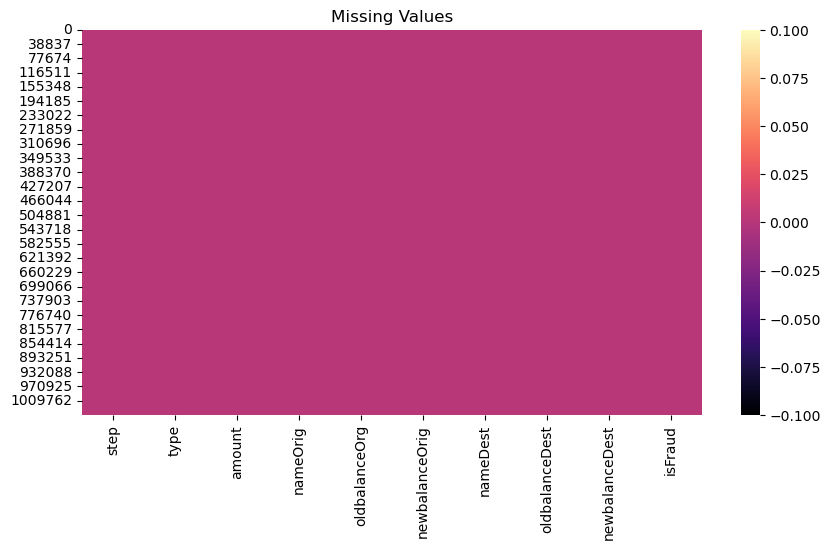

In [13]:
# visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Missing Values')
sns.heatmap(bank_data.isnull(), cbar = True, cmap = 'magma')

### Observation
- The graph above that shows the missing values is blank because there are no missing values for this data

### Exploratory Data Analysis: Relationship, Insights and Visualization
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

# Univariate Analysis

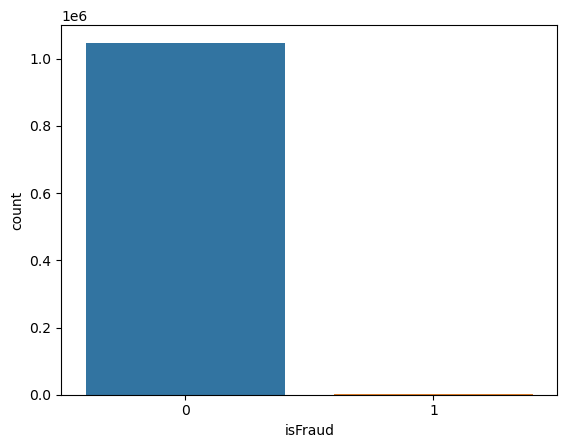

In [14]:
# visualize relationships between the label and some key features

sns.countplot(x = 'isFraud', data = bank_data)
plt.show()

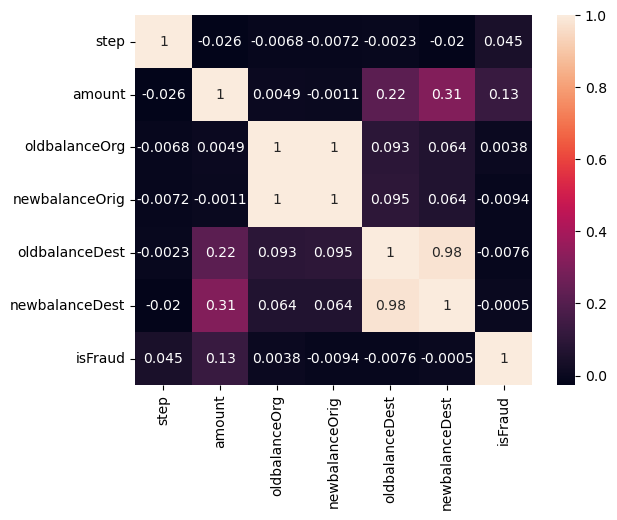

In [15]:
# Explore correlations

corr = bank_data.corr()
sns.heatmap(corr, annot = True)
plt.show()

## Conduct univariate and multivariate analysis

## Univariate analysis

In [16]:
bank_data.describe().astype('int')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [17]:
# Checking which recipients stand out 
bank_data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [18]:
# investigating to see how many times a customer started a transactions
bank_data.nameOrig.value_counts()

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: nameOrig, Length: 1048317, dtype: int64

In [19]:
# How many times a recipient got a transaction
bank_data.nameDest.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

In [20]:
bank_data.amount.max()

10000000.0

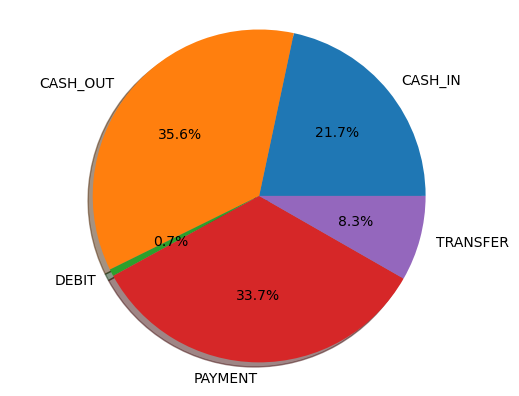

In [21]:
#Checking the distribution of the type of transactions made

labels = bank_data['type'].astype('category').cat.categories.tolist()
counts = bank_data['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
colors = ['#d62728', '#ff7f0e','#1f77b4', '#2ca02c', '#5DADE2', '#515A5A','#Bc564b']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

plt.pie(bank_data, labels = bank_data.index, colors = colors, autopct = '%1.1f%%', pctdistance = 0.85, explode = explode)

centre_circle = plt.Circle((0,0), 0.60, fc = 'white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.legend(bank_data.index, loc = 'center right')

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5, 0.5, 1))

plt.title('Loan by Marital Status')

In [22]:
bank_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


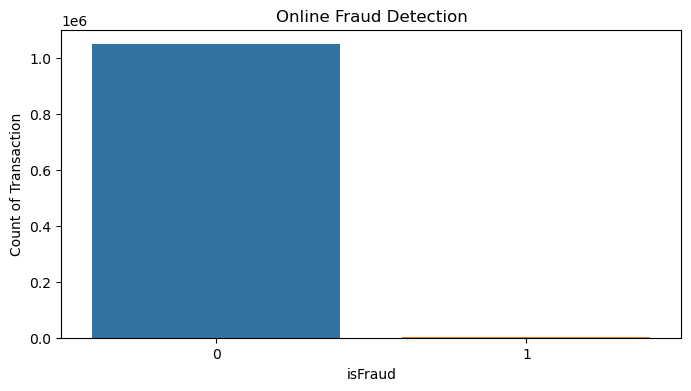

In [23]:
# Create a visual chart that shows the distribution of 'Fraud'and 'No Fraud'

plt.figure(figsize = (8,4))
plt.title('Online Fraud Detection')
sns.countplot(data = bank_data, x = 'isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count of Transaction')
plt.show()

In [24]:
# Univariate analysis of "Fraud" and "No Fraud" transactions

bank_data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [25]:
# What's the rate of Fraudulent Transactions?
# What percentage of Fraud transactions vs No Fraud Transactions

fraud_percent = (bank_data['isFraud'].value_counts()/bank_data.shape[0]*100).round(2)
fraud_percent

0    99.89
1     0.11
Name: isFraud, dtype: float64

## Multivariate Analysis

In [26]:
# separated target from dataset
# target = ['isFraud']

data = bank_data.drop(columns = ["nameOrig", "nameDest"], axis = 1)

In [27]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


<AxesSubplot:xlabel='type', ylabel='amount'>

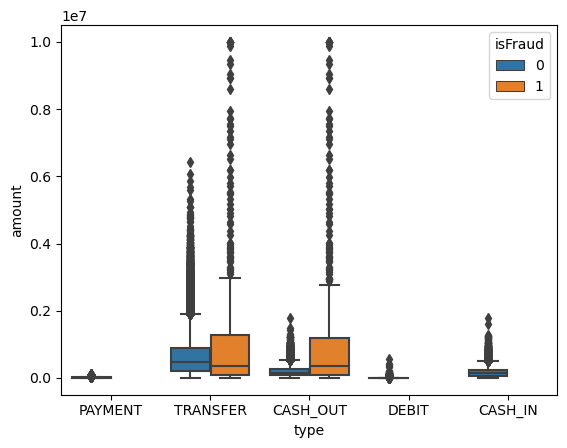

In [28]:
sns.boxplot(x = 'type', y = 'amount', hue = 'isFraud', data = bank_data)

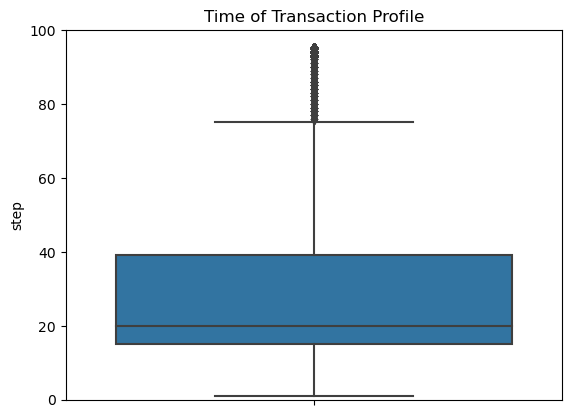

In [29]:
sns.boxplot(y=data.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

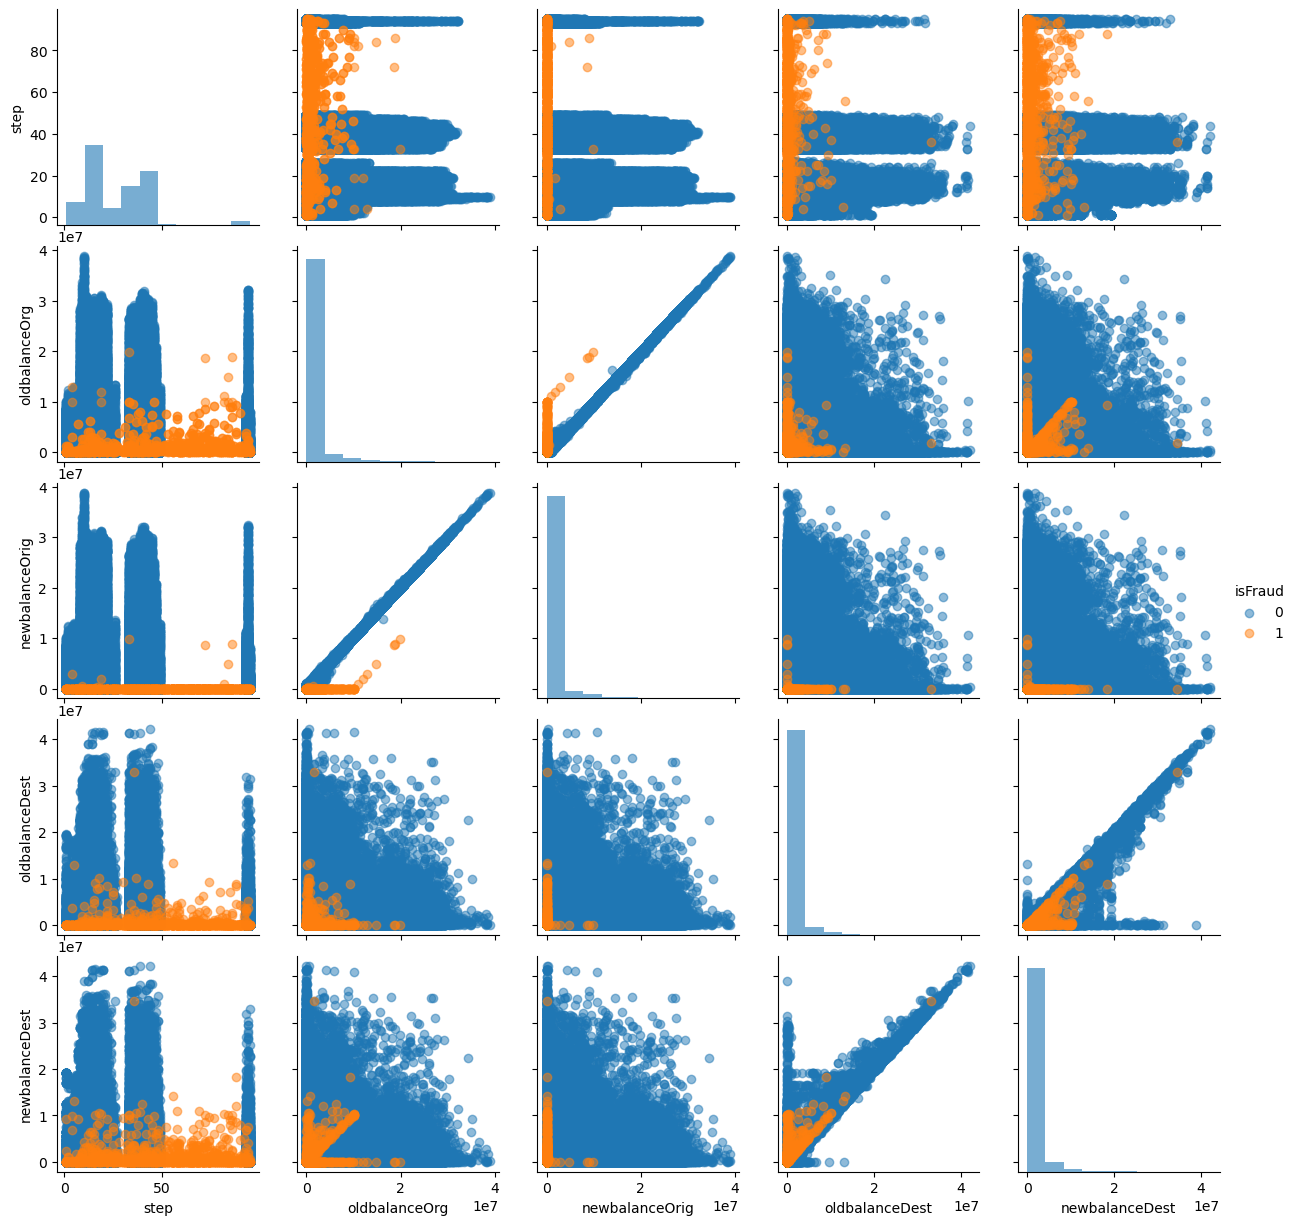

In [30]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(data, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

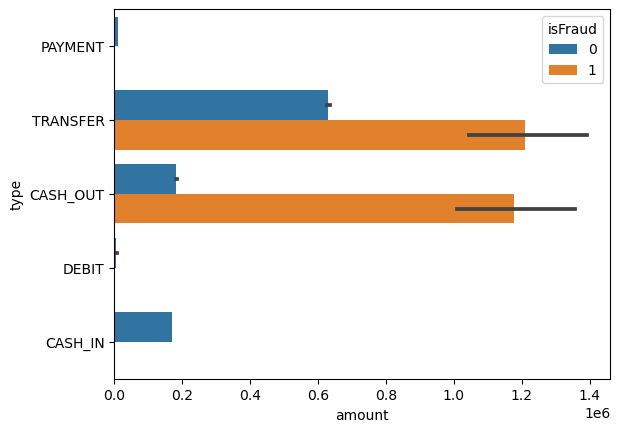

In [31]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show() 

### Feature Engineering

## Encoding categorical variables

In [32]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [33]:
#separated target from dataset
y = data["isFraud"]
X = data.drop("isFraud", axis=1)


In [34]:
# encoding categorical variables

X = pd.get_dummies(X)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [35]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [36]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

### Model selection, training, and validation

In [37]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(838860, 11)
(209715, 11)
(209715,)
(209715,)


## K-Fold Cross-Validation

In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume you have your input features in X and target variable in y DataFrame

# Define the number of folds (k)
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train your model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    
    # Print the score for each fold
    print(f"Fold {fold+1} score: {score}")

# Compute the average score
average_score = np.mean(scores)
print(f"Average score: {average_score}")

Fold 1 score: 0.030225954554540864
Fold 2 score: 0.030927434185495054
Fold 3 score: 0.03120468706978455
Fold 4 score: 0.02974689557094288
Fold 5 score: 0.03128572479733543
Average score: 0.030678139235619756


In [53]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import numpy as np


# Assume you have your input features in X and target variable in y DataFrame

# Define the number of folds (k)
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train your model on the training set
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    
    # Print the score for each fold
    print(f"Fold {fold+1} score: {score}")

# Compute the average score
average_score = np.mean(scores)
print(f"Average score: {average_score}")

Fold 1 score: 0.019894100099005607
Fold 2 score: 0.020132361287446467
Fold 3 score: 0.01839985611887076
Fold 4 score: 0.017740147252703408
Fold 5 score: 0.020600618328737358
Average score: 0.01935341661735272


In [54]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import numpy as np


# Assume you have your input features in X and target variable in y DataFrame

# Define the number of folds (k)
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train your model on the training set
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    
    # Print the score for each fold
    print(f"Fold {fold+1} score: {score}")

# Compute the average score
average_score = np.mean(scores)
print(f"Average score: {average_score}")

Fold 1 score: 0.019531259313232407
Fold 2 score: 0.020013585257988235
Fold 3 score: 0.021395422604680497
Fold 4 score: 0.020830799979485372
Fold 5 score: 0.02150656840507993
Average score: 0.02065552711209329


In [55]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import numpy as np


# Assume you have your input features in X and target variable in y DataFrame

# Define the number of folds (k)
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the evaluation scores
scores = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train your model on the training set
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    
    # Print the score for each fold
    print(f"Fold {fold+1} score: {score}")

# Compute the average score
average_score = np.mean(scores)
print(f"Average score: {average_score}")

Fold 1 score: 0.013101967053169057
Fold 2 score: 0.014970426783726893
Fold 3 score: 0.015594459997222214
Fold 4 score: 0.015285628228697232
Fold 5 score: 0.018138852029170083
Average score: 0.015418266818397095


## Train and test at least 2 supervised learning models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
# logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [42]:
print(log_reg_pred[:5])

[0 0 0 0 0]


In [43]:
# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf_pred = dt_clf.predict(X_test)

In [44]:
print(dt_clf_pred[:5])

[1 0 0 0 0]


In [45]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
print(knn_pred[:5])

[0 0 0 0 0]


In [47]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
# Classification report for logistic Regression
print(classification_report(y_test, log_reg_pred))
print()

# Classification report for Decision tree classifier
print(classification_report(y_test, dt_clf_pred))
print()

# Classification report for KNeighborsClassifier
print(classification_report(y_test, knn_pred))
print()

# Classification report for RandomForestClassifier
print(classification_report(y_test, rf_pred))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       0.71      0.35      0.47       241

    accuracy                           1.00    209715
   macro avg       0.85      0.68      0.74    209715
weighted avg       1.00      1.00      1.00    209715


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       0.80      0.79      0.79       241

    accuracy                           1.00    209715
   macro avg       0.90      0.89      0.90    209715
weighted avg       1.00      1.00      1.00    209715


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       0.79      0.53      0.63       241

    accuracy                           1.00    209715
   macro avg       0.89      0.76      0.82    209715
weighted avg       1.00      1.00      1.00    209715


              pr

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, log_reg_pred))
print()
print()
print(confusion_matrix(y_test, dt_clf_pred))
print()
print()
print(confusion_matrix(y_test, knn_pred))
print()
print()
print(confusion_matrix(y_test, rf_pred))

[[209439     35]
 [   156     85]]


[[209427     47]
 [    51    190]]


[[209440     34]
 [   114    127]]


[[209471      3]
 [    53    188]]
